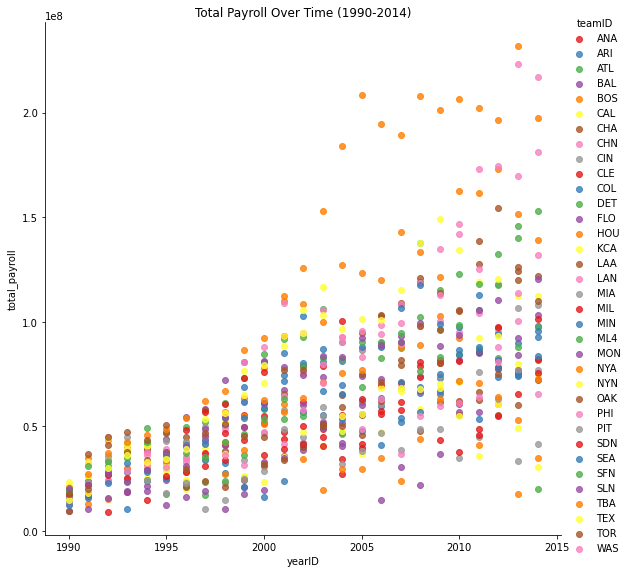

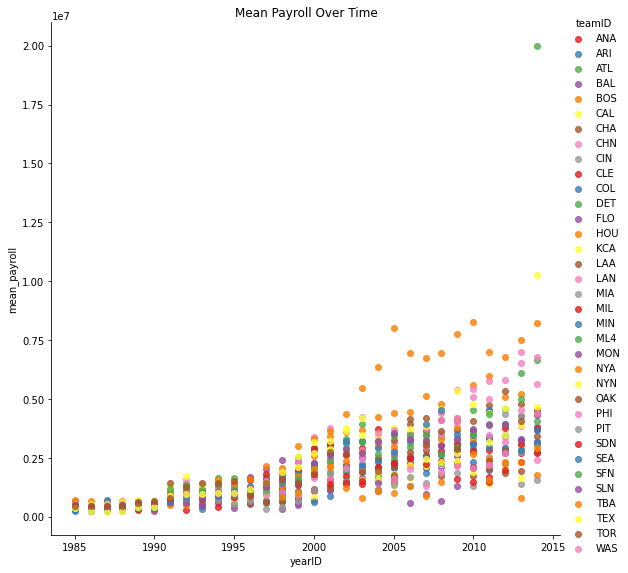

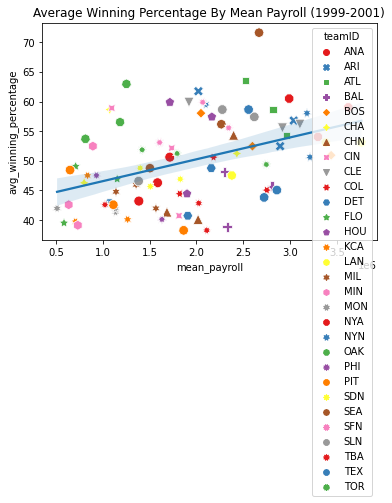

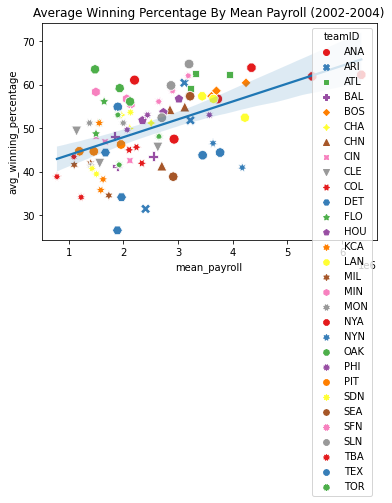

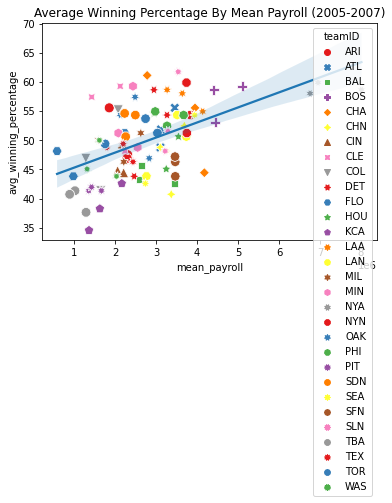

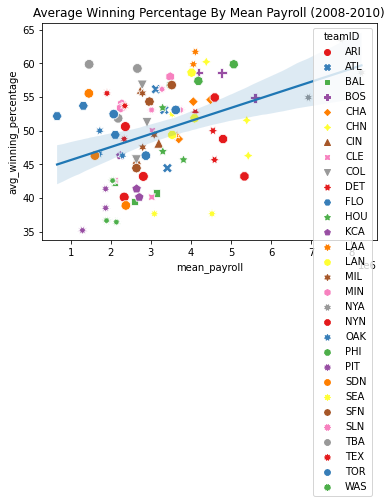

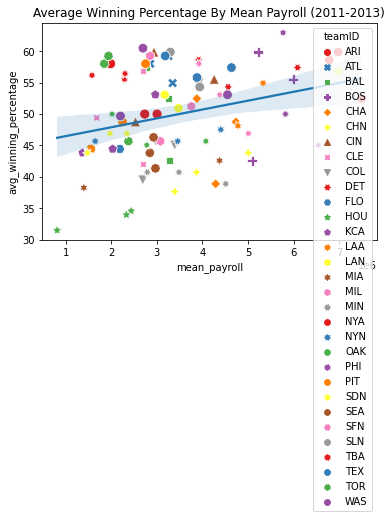

    teamID  yearID  mean_payroll  total_payroll  avg_winning_percentage  \
0      ANA    1997  1.004370e+06     31135472.0               51.851852   
1      ANA    1998  1.214147e+06     41281000.0               52.469136   
2      ANA    1999  1.384704e+06     55388166.0               43.209877   
3      ANA    2000  1.715472e+06     51464167.0               50.617284   
4      ANA    2001  1.584506e+06     47535167.0               46.296296   
..     ...     ...           ...            ...                     ...   
853    WAS    2010  2.046667e+06     61400000.0               42.592593   
854    WAS    2011  2.201963e+06     63856928.0               49.689441   
855    WAS    2012  2.695171e+06     80855143.0               60.493827   
856    WAS    2013  4.548131e+06    113703270.0               53.086420   
857    WAS    2014  4.399456e+06    131983680.0               59.259259   

     winning_percentage  standard_dev  standardized_payroll  
0             51.851852  3.982276e+07

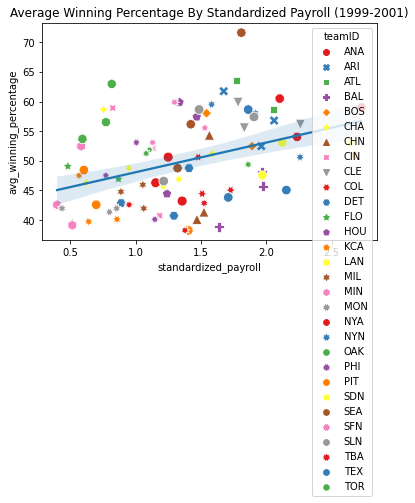

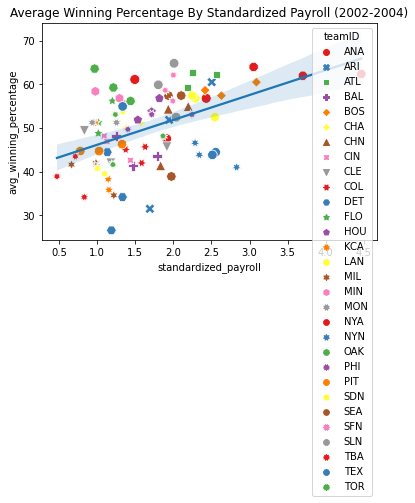

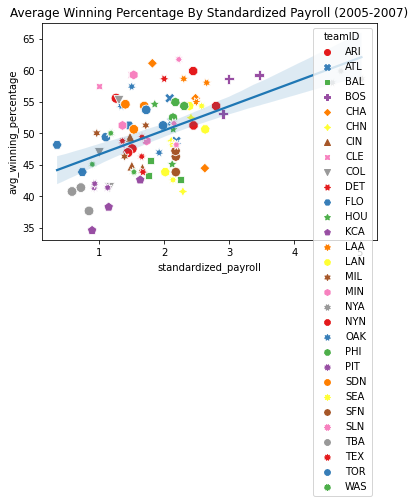

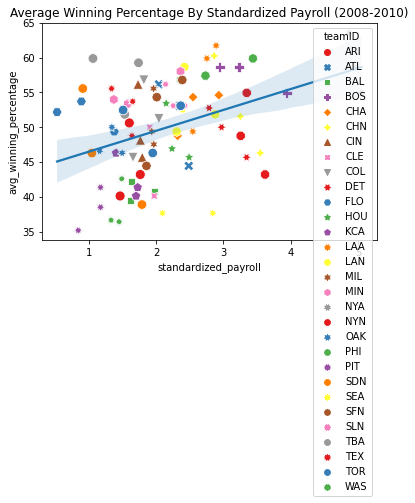

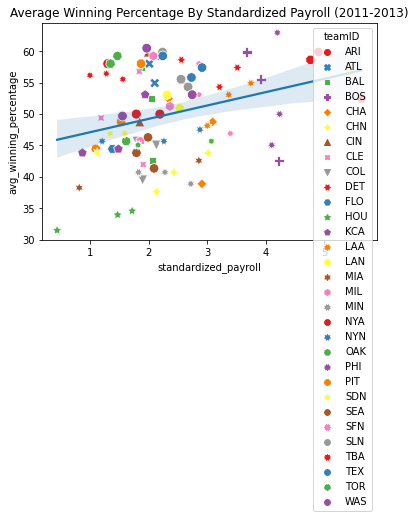

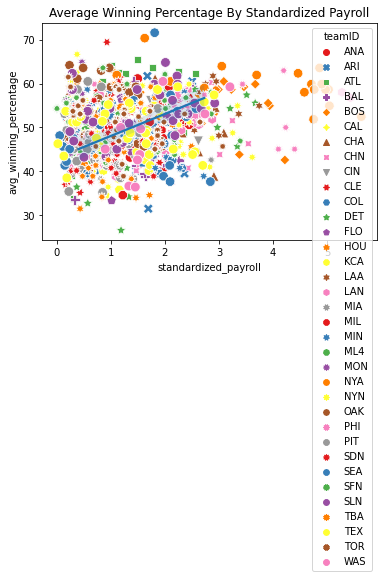

    teamID  yearID  mean_payroll  total_payroll  avg_winning_percentage  \
25     ATL    1985  6.730455e+05     14807000.0               40.740741   
26     ATL    1986  5.897512e+05     17102786.0               44.720497   
27     ATL    1987  5.170175e+05     16544560.0               42.857143   
28     ATL    1988  4.389026e+05     12728174.0               33.750000   
29     ATL    1989  3.704111e+05     11112334.0               39.130435   
..     ...     ...           ...            ...                     ...   
783    TBA    2010  2.663832e+06     71923471.0               59.259259   
784    TBA    2011  1.578984e+06     41053571.0               56.172840   
785    TBA    2012  2.291911e+06     64173500.0               55.555556   
786    TBA    2013  2.302403e+06     52955272.0               56.441718   
787    TBA    2014  2.907564e+06     72689100.0               47.530864   

     winning_percentage  standard_dev  standardized_payroll year_range  \
25            40.740741  

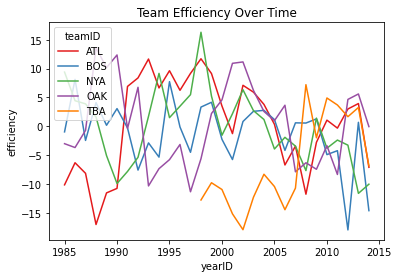

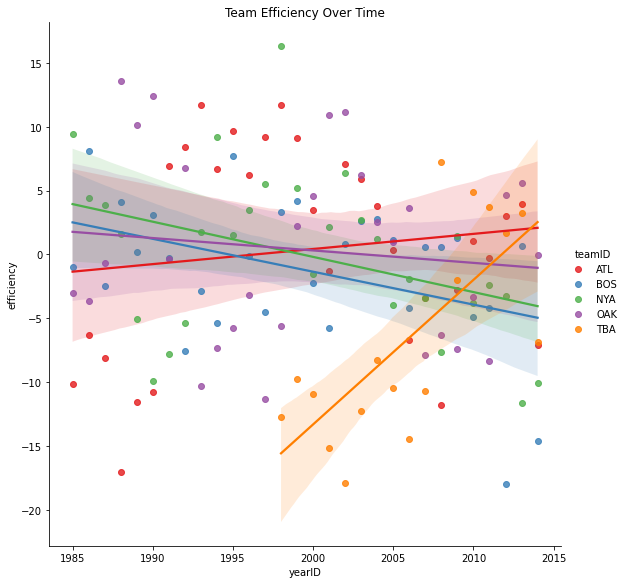

"\nQuestion 4 \nIn this plot you can much more readily see how the standardized payroll affected the winning percentage,\nand it becomes clear that most teams became much less efficient as they increased their standardized payroll.\n\nThe only team whose efficiency significantly rose from the time of the moneyball year was Tampa Bay until around 2013-2014. \nFrom about 1996 to the moneyball year, Oakland's efficiency was rising steadily. After the moneyball year, their efficiency\nbegan to decrease again.\nThe efficiency of the rest of the teams began to decrease at the time of the moneyball year.\n"

In [77]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat
%matplotlib inline

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"
team_salaries = pd.read_sql(salary_query, conn)
team_salaries.head()

#Prob1
wins_query = "SELECT ((CAST(t.W as FLOAT)/t.G) * 100.0) as winning_percentage, sum(s.salary) as total_payroll, avg(s.salary) as mean_payroll, * FROM Teams AS t INNER JOIN Salaries AS s ON t.teamID = s.teamID GROUP BY t.teamID, t.yearID"
wins = pd.read_sql(wins_query, conn)
"""
Because inner join combines the values that match from two tables and NULL values do not match other NULL values, any values that were NULL were automatically eliminated.
Nothing else was done to eliminate missing data.
"""
wins

#Prob2
distinct_query = "SELECT DISTINCT t.teamID, t.yearID, sum(s.salary) as total_payroll FROM Teams AS t INNER JOIN Salaries AS s ON t.teamID = s.teamID WHERE (t.yearID >= 1990 AND t.yearID <= 2014 AND t.yearID == s.yearID) GROUP BY t.teamID, t.yearID"
distinct = pd.read_sql(distinct_query, conn)

distinct_df = pd.DataFrame(distinct)

sns.lmplot(x = 'yearID', y = 'total_payroll', fit_reg = False, hue = 'teamID', data = distinct_df, height = 8, palette = 'Set1')
ax = plt.gca()
ax.set_title("Total Payroll Over Time (1990-2014)")

plt.show()

distinct_df

"""
Question 1

This plot shows that the overall distribution of total payrolls over time increased from 1990-2014
and reached the highest total payrolls in 2014 as this is a left-skewed distribution.
The spread of total payrolls also increased during this time period. Whereas the spread
of total payrolls across all teams was relatively clustered until about 1999, the spread began to 
become larger between 1999-2002 and increased significantly until 2014. 

"""

#Prob 3
mean_payroll_query = "SELECT DISTINCT t.teamID, avg(s.salary) as mean_payroll, t.yearID FROM Salaries s INNER JOIN Teams t ON s.teamID = t.teamID WHERE (s.yearID == t.yearID) GROUP BY t.teamID, t.yearID"
mean_sal = pd.read_sql(mean_payroll_query, conn)

mean_sal_df = pd.DataFrame(mean_sal)
mean_sal_df

sns.lmplot(x = 'yearID', y = 'mean_payroll', fit_reg = False, hue = 'teamID', data = mean_sal_df, height = 8, palette = 'Set1')
ax = plt.gca()
ax.set_title("Mean Payroll Over Time")

plt.show()

#Prob4

discret_query = "SELECT t.teamID, t.yearID, sum(s.salary)/count(s.salary) as mean_payroll, avg((CAST(t.W as FLOAT)/t.G) * 100.0) as avg_winning_percentage FROM Teams t INNER JOIN Salaries s ON t.teamID = s.teamID WHERE t.yearID == s.yearID GROUP BY t.teamID, t.yearID"
discret = pd.read_sql(discret_query, conn)


discretize_df = pd.DataFrame(data = discret)
discretize_df

years = [1998, 2001, 2004, 2007, 2010, 2013]
years_group = ['1999-2001','2002-2004','2005-2007','2008-2010', '2011-2013']
year_range = pd.cut(discretize_df['yearID'], years, labels = years_group)
discretize_df['year_range'] = pd.cut(discretize_df['yearID'], years, labels = years_group)

discretize_df

disc_group = discretize_df.groupby('year_range')
range1 = disc_group.get_group('1999-2001')

ax = sns.scatterplot(x = 'mean_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range1, s = 100, palette = 'Set1')
sns.regplot(data = range1, x = 'mean_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Mean Payroll (1999-2001)")

plt.show()

range2 = disc_group.get_group('2002-2004')

ax = sns.scatterplot(x = 'mean_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range2, s = 100, palette = 'Set1')
sns.regplot(data = range2, x = 'mean_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Mean Payroll (2002-2004)")

plt.show()

range3 = disc_group.get_group('2005-2007')

ax = sns.scatterplot(x = 'mean_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range3, s = 100, palette = 'Set1')
sns.regplot(data = range3, x = 'mean_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Mean Payroll (2005-2007)")

plt.show()

range4 = disc_group.get_group('2008-2010')

ax = sns.scatterplot(x = 'mean_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range4, s = 100, palette = 'Set1')
sns.regplot(data = range4, x = 'mean_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Mean Payroll (2008-2010)")

plt.show()

range5 = disc_group.get_group('2011-2013')

ax = sns.scatterplot(x = 'mean_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range5, s = 100, palette = 'Set1')
sns.regplot(data = range5, x = 'mean_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Mean Payroll (2011-2013)")

plt.show()

"""
Question 2

From 1999-2001, Oakland had some of the highest average winning percentages and the lowest average payrolls.
From 2002-2004, we can see the average payrolls of the Oakland A's increasing slightly while they still remain
one of the teams with the highest average winning percentages.
From 2005-2007, the Oakland A's continue to increase their average payroll at the time they report
their highest average payroll yet, they reach their lowest average winning percentage yet.

From 2002-2004, we see the Cardinals(SLN) and Braves(ATL) being two teams who are paying some of 
the highest average payrolls and also achieving some of the highest average winning percentages.

From 2002-2013, the Red Sox(BOS) appear to be one of the best teams at paying for wins;
that is, they remain the team with some of the highest average payrolls and highest average winning percentages
throughout each time period.

"""
#Prob5and6

stand_query = "SELECT  t.teamID, t.yearID, avg(s.salary) as mean_payroll, sum(s.salary) as total_payroll, avg((CAST(t.W as FLOAT)/t.G) * 100.0) as avg_winning_percentage, (CAST(t.W as FLOAT)/t.G * 100.0) as winning_percentage FROM Teams t INNER JOIN Salaries s ON t.teamID = s.teamID WHERE t.yearID == s.yearID GROUP BY t.teamID, t.yearID"
stand_pay = pd.read_sql(stand_query, conn)


stand_pay_df = pd.DataFrame(data = stand_pay)
stand_pay_df['standard_dev'] = stat.stdev(stand_pay_df['total_payroll'])
stand_pay_df['standardized_payroll'] = (stand_pay_df['total_payroll'] - stand_pay_df['mean_payroll']) / (stand_pay_df['standard_dev'])

print(stand_pay_df)

years = [1998, 2001, 2004, 2007, 2010, 2013]
years_group = ['1999-2001','2002-2004','2005-2007','2008-2010', '2011-2013']
year_range = pd.cut(stand_pay_df['yearID'], years, labels = years_group)
stand_pay_df['year_range'] = pd.cut(stand_pay_df['yearID'], years, labels = years_group)

stand_pay_df

stand_group = stand_pay_df.groupby('year_range')
range1 = stand_group.get_group('1999-2001')

ax = sns.scatterplot(x = 'standardized_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range1, s = 100, palette = 'Set1')
sns.regplot(data = range1, x = 'standardized_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Standardized Payroll (1999-2001)")

plt.show()

range2 = stand_group.get_group('2002-2004')

ax = sns.scatterplot(x = 'standardized_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range2, s = 100, palette = 'Set1')
sns.regplot(data = range2, x = 'standardized_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Standardized Payroll (2002-2004)")

plt.show()

range3 = stand_group.get_group('2005-2007')

ax = sns.scatterplot(x = 'standardized_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range3, s = 100, palette = 'Set1')
sns.regplot(data = range3, x = 'standardized_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Standardized Payroll (2005-2007)")

plt.show()

range4 = stand_group.get_group('2008-2010')

ax = sns.scatterplot(x = 'standardized_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range4, s = 100, palette = 'Set1')
sns.regplot(data = range4, x = 'standardized_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Standardized Payroll (2008-2010)")

plt.show()

range5 = stand_group.get_group('2011-2013')

ax = sns.scatterplot(x = 'standardized_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = range5, s = 100, palette = 'Set1')
sns.regplot(data = range5, x = 'standardized_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Standardized Payroll (2011-2013)")

plt.show()

"""
Question 3 

The standardized payrolls across the time periods are a lot lower than the average payrolls across time periods.
This results in less cluster for the plots using standardized payroll and appears to more difinitively distribute
the average winning percentages across all teams across the linear regression line. 

"""

#Prob7
ax = sns.scatterplot(x = 'standardized_payroll', y = 'avg_winning_percentage', hue = 'teamID', style = 'teamID', data = stand_pay_df, s = 100, palette = 'Set1')
sns.regplot(data = range1, x = 'standardized_payroll', y = 'avg_winning_percentage', scatter=False, ax=ax)
ax = plt.gca()
ax.set_title("Average Winning Percentage By Standardized Payroll")

plt.show()

#Prob8
stand_pay_df['expected_win_pct'] = 50 + (2.5 * stand_pay_df['standardized_payroll'])
stand_pay_df['efficiency'] = stand_pay_df['winning_percentage'] - stand_pay_df['expected_win_pct']

tids = {'OAK', 'BOS', 'NYA', 'ATL','TBA'}
efficient_df = stand_pay_df.loc[stand_pay_df['teamID'].isin(tids)]


print(efficient_df)

sns.lineplot(x = 'yearID', y = 'efficiency', hue = 'teamID', data = efficient_df, palette = 'Set1')
ax = plt.gca()
ax.set_title("Team Efficiency Over Time")
plt.show()

sns.lmplot(x = 'yearID', y = 'efficiency', fit_reg = True, hue = 'teamID', data = efficient_df, height = 8, palette = 'Set1')
ax = plt.gca()
ax.set_title("Team Efficiency Over Time")
plt.show()

"""
Question 4 
In this plot you can much more readily see how the standardized payroll affected the winning percentage,
and it becomes clear that most teams became much less efficient as they increased their standardized payroll.

The only team whose efficiency significantly rose from the time of the moneyball year was Tampa Bay until around 2013-2014. 
From about 1996 to the moneyball year, Oakland's efficiency was rising steadily. After the moneyball year, their efficiency
began to decrease again.
The efficiency of the rest of the teams began to decrease at the time of the moneyball year.
"""
